In [1]:
import pandas as pd
from os.path import join

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from  icecream import ic

In [99]:
n_donors = 4
mult_dir = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex"
don_dir = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0"
af_f = ""
cov_f = ""
curr_donor = 0
samples = "Control,Flt3l"

In [100]:
samples = samples.split(",")

In [101]:
samples

['Control', 'Flt3l']

## Variant allele-frequency thresholds and coverage thresholds parameters

In [5]:
thresholds = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9]
read_thresh = [2, 10, 25, 50, 100]
cells_thresh=10
ref_cells_thresh=500

## Load af, cov, and cells_meta

In [6]:
af = pd.read_csv(join(don_dir, "af.tsv"), sep="\t", index_col=0)
print(af.shape)
af.head()

(4205, 220)


,10086G,10318C,10373A,10398G,103A,10400T,1040C,10634C,10644A,1082G,...,9098C,9173A,9254G,9340G,9385C,9449T,9523G,9540C,9545G,9658G
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGTCGTGAG-1_Control,0.222222,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,...,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.916667,0.958333,0.0
AAACGAACACAATAAG-1_Control,0.000000,0.0,0.0,0.953488,0.0,0.952381,0.0,0.0,1.000000,0.0,...,1.000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0
AAACGAAGTAAGTCTC-1_Control,0.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,...,1.000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0
AAACGAAGTGGATTCT-1_Control,0.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,0.987179,0.0,...,0.975,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0
AAACGAATCGCAACTA-1_Control,0.060606,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,...,1.000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.992308,0.0


In [7]:
cells_meta = pd.read_csv(join(don_dir,"cells_meta.tsv"), sep="\t").set_index("ID")
ic(cells_meta.shape)
cells_meta = cells_meta.loc[af.index]
ic("After filtering on af indices", cells_meta.shape)

ic| cells_meta.shape: (4205, 6)
ic| 'After filtering on af indices', cells_meta.shape: (4205, 6)


('After filtering on af indices', (4205, 6))

In [8]:
cov = pd.read_csv(join(don_dir, "dp.tsv"), sep="\t", index_col=0)                   
print(cov.shape)
cov.head()

(4205, 220)


,10086G,10318C,10373A,10398G,103A,10400T,1040C,10634C,10644A,1082G,...,9098C,9173A,9254G,9340G,9385C,9449T,9523G,9540C,9545G,9658G
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGTCGTGAG-1_Control,9.0,18.0,16.0,10.0,19.0,10.0,14.0,33.0,33.0,11.0,...,23.0,20.0,35.0,18.0,32.0,35.0,18.0,24.0,24.0,39.0
AAACGAACACAATAAG-1_Control,22.0,75.0,63.0,43.0,66.0,42.0,46.0,89.0,83.0,29.0,...,39.0,71.0,69.0,58.0,57.0,76.0,51.0,45.0,40.0,55.0
AAACGAAGTAAGTCTC-1_Control,9.0,8.0,11.0,11.0,13.0,11.0,24.0,36.0,31.0,1.0,...,14.0,14.0,16.0,8.0,16.0,20.0,21.0,27.0,23.0,13.0
AAACGAAGTGGATTCT-1_Control,31.0,63.0,56.0,37.0,70.0,36.0,47.0,80.0,78.0,51.0,...,40.0,93.0,49.0,42.0,72.0,77.0,57.0,50.0,52.0,81.0
AAACGAATCGCAACTA-1_Control,99.0,225.0,214.0,179.0,196.0,178.0,199.0,276.0,283.0,240.0,...,214.0,201.0,188.0,218.0,223.0,277.0,253.0,269.0,260.0,211.0


## Functions for creating the variant dfs

In [9]:
def is_af_in_cell(cell_var, t, rt=None, is_af_above=True, check_cov=False):
    """
    Checks which cells pass the thresholds using the af and cov columns
    """
    if check_cov:
        return cell_var[cell_var["cov"]>rt].index
    if is_af_above:
        if rt is None:
            return cell_var[cell_var["af"] > t].index
        else:
            return cell_var[(cell_var["af"] > t) & (cell_var["cov"] > rt)].index
    else:
        if rt is None:
            return cell_var[cell_var["af"] < t].index
        else:
            return cell_var[(cell_var["af"] < t) & (cell_var["cov"] > rt)].index        
    return

In [10]:
def calc_variant_descriptives(cells_df, name, prefix=""):#, t, rt, 
    vars_ser = {}
    vars_ser[f"{prefix}{name}_median"] = cells_df["af"].median()
    vars_ser[f"{prefix}{name}_mean"] = cells_df["af"].mean(axis=0)
    vars_ser[f"{prefix}{name}_coverage_median"] = cells_df["cov"].median()
    vars_ser[f"{prefix}{name}_coverage_mean"] = cells_df["cov"].mean()
    vars_ser[f"{prefix}{name}_nCells"] = len(cells_df)
    return pd.Series(vars_ser)


## Setup the variants_df columns

In [103]:
def set_keys(cols, curr):
    keys = ["_median", "_mean", "_nCells", "_coverage_median", "_coverage_mean"]
    for k in keys:
        cols.append(f"{curr}{k}")
    return cols


def add_columns(columns, thresholds, read_thresh, sample=None):
    if sample is None:
        prefix = ""
    else:
        prefix=f"cond{sample}_"

    for t in thresholds:
        #columns.append(t)
        columns = set_keys(columns, f"{prefix}{t}" )
        for rt in read_thresh:
            columns = set_keys(columns, f"{prefix}{t}_{rt}" )
            columns = set_keys(columns, f"{prefix}{t}_{rt}_refPassCov" )
    return columns


columns = []
columns = add_columns(columns, thresholds, read_thresh)
for s in samples:
    columns = add_columns(columns, thresholds, read_thresh, sample=s)
columns

['0.01_median',
 '0.01_mean',
 '0.01_nCells',
 '0.01_coverage_median',
 '0.01_coverage_mean',
 '0.01_2_median',
 '0.01_2_mean',
 '0.01_2_nCells',
 '0.01_2_coverage_median',
 '0.01_2_coverage_mean',
 '0.01_2_refPassCov_median',
 '0.01_2_refPassCov_mean',
 '0.01_2_refPassCov_nCells',
 '0.01_2_refPassCov_coverage_median',
 '0.01_2_refPassCov_coverage_mean',
 '0.01_10_median',
 '0.01_10_mean',
 '0.01_10_nCells',
 '0.01_10_coverage_median',
 '0.01_10_coverage_mean',
 '0.01_10_refPassCov_median',
 '0.01_10_refPassCov_mean',
 '0.01_10_refPassCov_nCells',
 '0.01_10_refPassCov_coverage_median',
 '0.01_10_refPassCov_coverage_mean',
 '0.01_25_median',
 '0.01_25_mean',
 '0.01_25_nCells',
 '0.01_25_coverage_median',
 '0.01_25_coverage_mean',
 '0.01_25_refPassCov_median',
 '0.01_25_refPassCov_mean',
 '0.01_25_refPassCov_nCells',
 '0.01_25_refPassCov_coverage_median',
 '0.01_25_refPassCov_coverage_mean',
 '0.01_50_median',
 '0.01_50_mean',
 '0.01_50_nCells',
 '0.01_50_coverage_median',
 '0.01_50_cove

## Create two variant-centric variables:
a) variants_df: dataframe where index is the variants and columns are clone metrics for each variant, and the column labels contain the parameter information (e.g. {thresholdA}\_{read_thresholdB})  
b) variants_cell_index: dict(key=variant, value=dictionary:key=params tuple, value=passed cell indices)

In [12]:
variants = set(af.columns)
variants_cell_index_d = {}
variants_df_init = {}
for v in variants:
    print('variant', v)
    curr_v_d = {}
    variants_d = {}
    
    # create cell-by-(af,cov) df to pass into summary functions
    curr_v_df = pd.concat((af.loc[:,[v]].rename({v:"af"}, axis=1),
                           cov.loc[:,[v]].rename({v:"cov"}, axis=1)), axis=1)

    for t in thresholds:
        curr_v_d[t] = is_af_in_cell(curr_v_df, t, rt=None, is_af_above=True, check_cov=False)
        variants_d[t] = calc_variant_descriptives(curr_v_df.loc[curr_v_d[t]], name=f"{t}")
        
        for rt in read_thresh:
            curr_v_d[(t,rt)] = is_af_in_cell(curr_v_df, t, rt=rt, is_af_above=True, check_cov=False)
            variants_d[(t,rt)] = calc_variant_descriptives(curr_v_df.loc[curr_v_d[(t,rt)]], 
                                                                 name=f"{t}_{rt}")
            
            curr_v_d[(t,rt, "ref_pass_cov")] = is_af_in_cell(curr_v_df, t, rt=rt, 
                                                             is_af_above=False, check_cov=False)
            variants_d[(t,rt, "ref_pass_cov")] = calc_variant_descriptives(curr_v_df.loc[curr_v_d[(t,rt, "ref_pass_cov")]], 
                                                                                 name=f"{t}_{rt}_refPassCov")
            
    for rt in read_thresh:
        curr_v_d[(rt, "pass_cov")] = is_af_in_cell(curr_v_df, t=None, rt=rt, is_af_above=False, check_cov=True)
        variants_d[(rt, "pass_cov")] = calc_variant_descriptives(curr_v_df.loc[curr_v_d[(rt, "pass_cov")]], 
                                                                             name=f"{rt}_passCov")
    variants_cell_index_d[v] = curr_v_d 
    variants_df_init[v] = variants_d

# Combine all the variants from the dictionary
variants_df = pd.DataFrame(index=variants, columns = columns)
for v in variants_df_init:
    variants_df.loc[v] = pd.concat([val for val in variants_df_init[v].values()])

variants_df["median"] = af.median()
variants_df["mean"] = af.mean()

variant 16111T
variant 7403G
variant 3242A
variant 513A
variant 7639T
variant 4100A
variant 2514A
variant 12232G
variant 1736G
variant 13094A
variant 16319A
variant 3561G
variant 8794T
variant 567C
variant 7167C
variant 16298C
variant 16311C
variant 9340G
variant 7775A
variant 146C
variant 189G
variant 12808C
variant 49G
variant 8860G
variant 11719A
variant 15672C
variant 14575C
variant 9545G
variant 14560A
variant 14985A
variant 10873C
variant 4820T
variant 13105G
variant 11999C
variant 4837A
variant 10400T
variant 10373A
variant 16153A
variant 9540C
variant 13443A
variant 2623G
variant 6207G
variant 185A
variant 14488C
variant 7849T
variant 12414C
variant 1888A
variant 3552A
variant 4042C
variant 15824G
variant 13339A
variant 16525C
variant 9254G
variant 16124C
variant 16512A
variant 9173A
variant 7361T
variant 15487T
variant 2706G
variant 523C
variant 2521G
variant 7485C
variant 14783C
variant 9087A
variant 799G
variant 310C
variant 14808C
variant 750G
variant 16223T
variant 12079T


In [98]:
#########################
## Add in sample information
#########################


def get_variant_info(curr_af, curr_cov, variants_cell_index_d, curr_cells_meta, prefix="", columns):
    for v in variants:
        print('variant', v)
        curr_v_d = {}
        variants_d = {}
        
        
        # create cell-by-(af,cov) df to pass into summary functions
        curr_v_df = pd.concat((curr_af.loc[:,[v]].rename({v:"af"}, axis=1),
                               curr_cov.loc[:,[v]].rename({v:"cov"}, axis=1)), axis=1)
        for t in thresholds:
            if prefix == "":
                t_key = t
            else:
                t_key = (t, prefix)
            curr_v_d[t_key] = is_af_in_cell(curr_v_df, t, rt=None, is_af_above=True, check_cov=False)
            variants_d[t_key] = calc_variant_descriptives(curr_v_df.loc[curr_v_d[t]], name=f"{t}", prefix=prefix)

            for rt in read_thresh:
                if prefix == "":
                    trt_key = (t,rt)
                    reftrt_key = (t, rt, "ref_pass_cov")
                else:
                    trt_key = (t,rt, prefix, "ref_pass_cov") 
                    reftrt_key = (t, rt, prefix, "ref_pass_cov")
                
                curr_v_d[trtkey] = is_af_in_cell(curr_v_df, t, rt=rt, is_af_above=True, check_cov=False)
                variants_d[trtkey] = calc_variant_descriptives(curr_v_df.loc[curr_v_d[(t,rt)]], 
                                                                     name=f"{t}_{rt}", prefix=prefix)

                curr_v_d[reftrt_key] = is_af_in_cell(curr_v_df, t, rt=rt, 
                                                                 is_af_above=False, check_cov=False)
                variants_d[reftrt_key] = calc_variant_descriptives(curr_v_df.loc[curr_v_d[(t,rt, "ref_pass_cov")]], 
                                                                               name=f"{t}_{rt}_refPassCov",
                                                                               prefix=prefix)


                    
        for rt in read_thresh:
            if prefix == "":
                rt_key = (rt, "pass_cov")
            else:
                rt_key = (rt,  "pass_cov", prefix)
            curr_v_d[rt_key] = is_af_in_cell(curr_v_df, t=None, rt=rt, is_af_above=False, check_cov=True)
            variants_d[rt_key] = calc_variant_descriptives(curr_v_df.loc[curr_v_d[(rt, "pass_cov")]], 
                                                                                 name=f"{rt}_passCov", prefix=prefix)
        variants_cell_index_d[v] = curr_v_d 
        variants_df_init[v] = variants_d    
     


    # Combine all the variants from the dictionary
    variants_df = pd.DataFrame(index=variants, columns = columns)
    for v in variants_df_init:
        variants_df.loc[v] = pd.concat([val for val in variants_df_init[v].values()])

    variants_df[f"{prefix}median"] = curr_af.median()
    variants_df[f"{prefix}mean"] = curr_af.mean()
    variants_df[f"{prefix}median_cov"] = curr_cov.median()
    variants_df[f"{prefix}mean_cov"] = curr_cov.mean()
    return variants_df, variants_cell_index_d


Control
(1623, 6)
Flt3l
(2582, 6)


In [ ]:
for s in samples:
    # Sample specific values
    curr_v_df_sample = curr_v_df.loc[cells_meta[cells_meta["condition"]==s].index]
    curr_v_d[(t,rt, s)] = is_af_in_cell(curr_v_df_sample, t, rt=rt, is_af_above=True, check_cov=False)
    variants_d[(t, rt, s)] = calc_variant_descriptives(curr_v_df_sample.loc[curr_v_d[(t,rt, s)]], 
                                                       name=f"cond{sample}_{t}_{rt}", 
                                                       prefix=prefix)
    curr_v_d[(t,rt, "ref_pass_cov", s)] = is_af_in_cell(curr_v_df_sample, t, rt=rt, 
                                                     is_af_above=False, check_cov=False)
    variants_d[(t,rt, "ref_pass_cov", s)] = calc_variant_descriptives(curr_v_df_sample.loc[curr_v_d[(t,rt, "ref_pass_cov", s)]], 
                                                                   name=f"cond{sample}_{t}_{rt}_refPassCov",
                                                                   prefix=prefix)

In [106]:
x = ["hi"]
x += [1,2]

In [ ]:
variants = set(af.columns)
variants_cell_index_d = {}
#variants_df_init = {}

variants_df, variants_cell_index_d = get_variant_info(curr_af, curr_cov, 
                                                      variants_cell_index_d, curr_cells_meta, prefix="")
columns = add_columns([], thresholds, read_thresh)

for sample, curr_cells_meta in cells_meta.groupby("condition"):
    print(sample)
    print(curr_cells_meta.shape)
    
    curr_af = af.loc[curr_cells_meta.index]
    curr_cov = cov.loc[curr_cells_meta.index]
    curr_columns = add_columns([], thresholds, read_thresh, sample=s)
    columns += curr_columns
    curr_variants_df, variants_cell_index_d = get_variant_info(curr_af, curr_cov, 
                                                               variants_cell_index_d, prefix=f"{sample}_")
    variants_df = pd.concat((variants_df, curr_variants_df), axis=1)

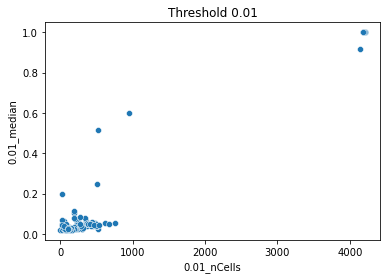

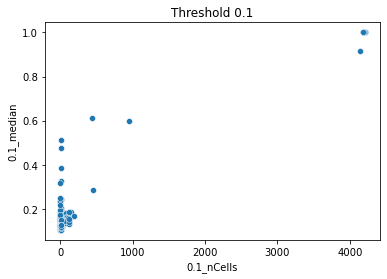

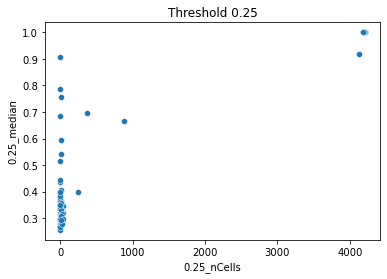

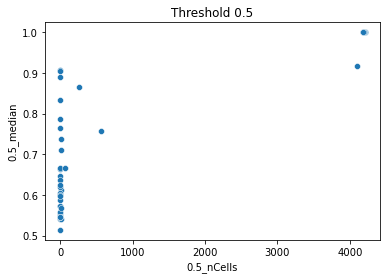

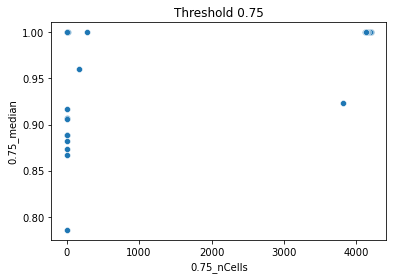

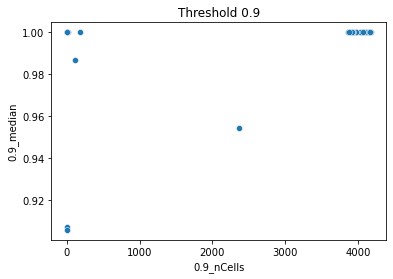

In [13]:
for t in thresholds:
    f = plt.figure()
    sns.scatterplot(x=f"{t}_nCells",y=f"{t}_median",data=variants_df.astype(float))
    plt.title(f"Threshold {t}")

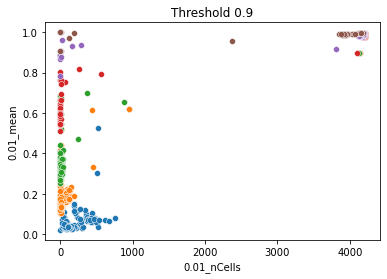

In [14]:
for t in thresholds:
    sns.scatterplot(x=f"{t}_nCells",y=f"{t}_mean",data=variants_df.astype(float))
    plt.title(f"Threshold {t}")

## Remove high variants

In [15]:
variants_df = variants_df[~(variants_df["median"] > 0.6)]

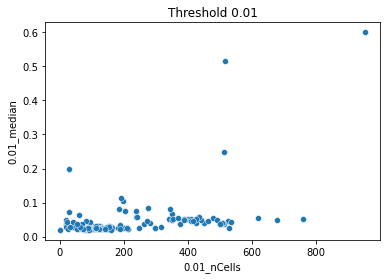

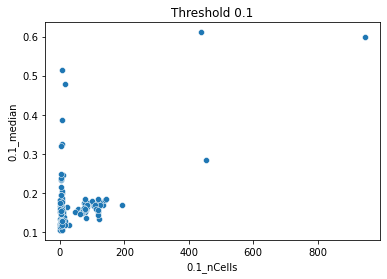

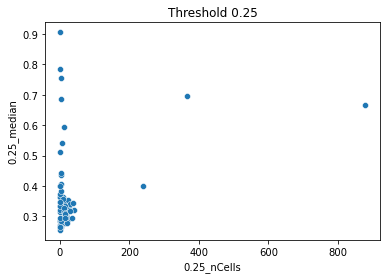

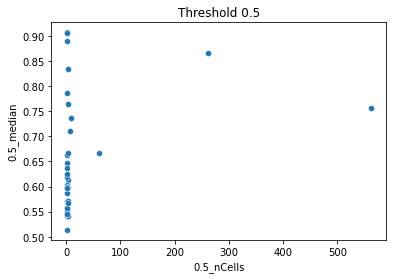

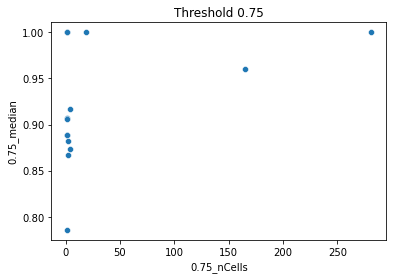

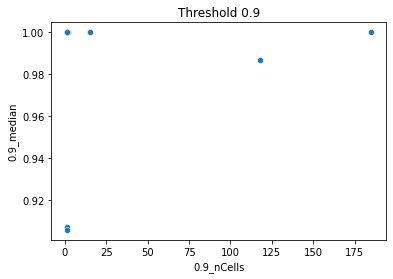

In [16]:
for t in thresholds:
    f = plt.figure()
    sns.scatterplot(x=f"{t}_nCells",y=f"{t}_median",data=variants_df.astype(float))
    plt.title(f"Threshold {t}")

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


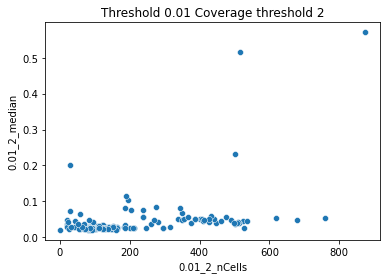

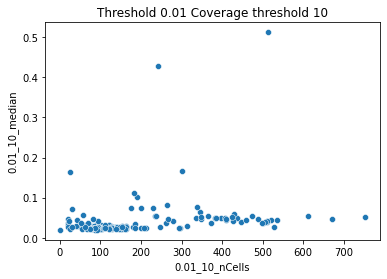

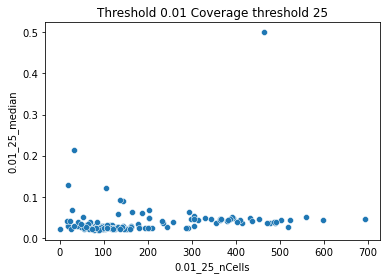

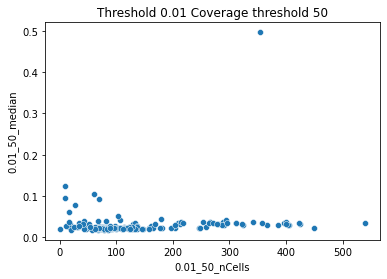

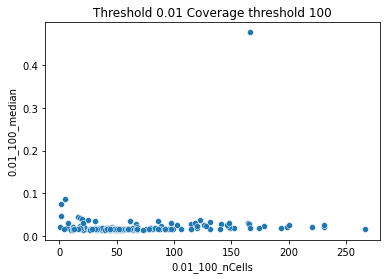

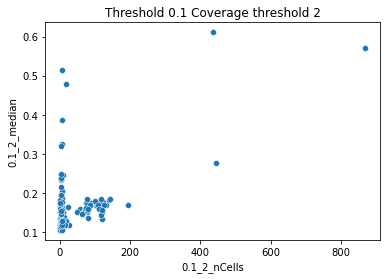

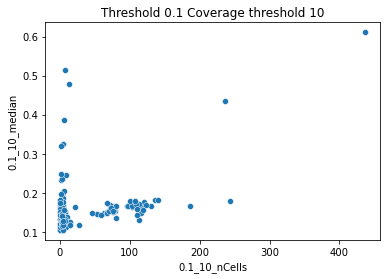

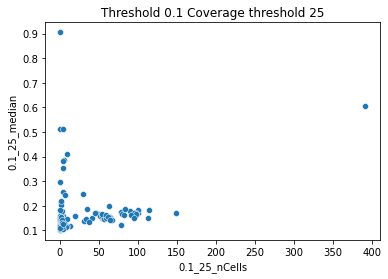

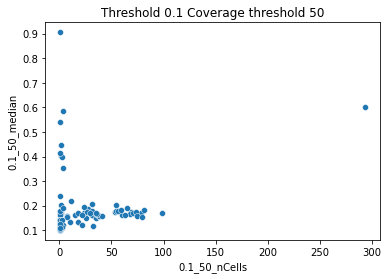

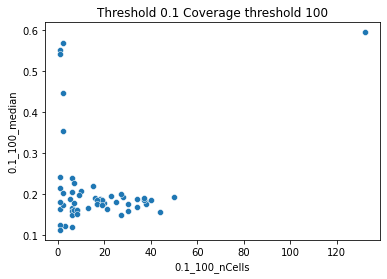

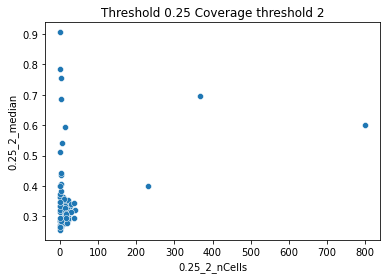

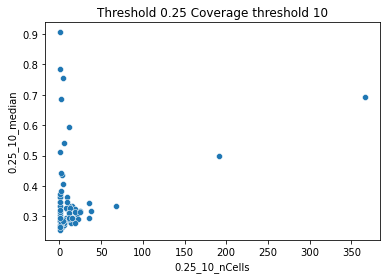

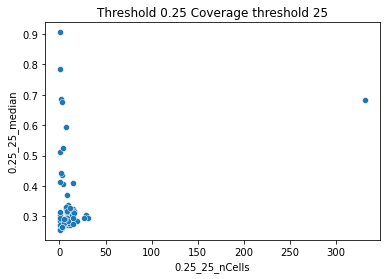

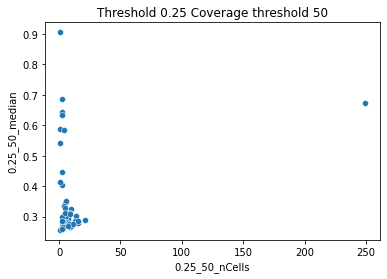

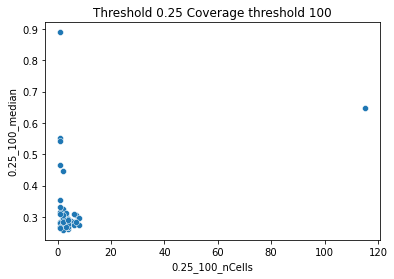

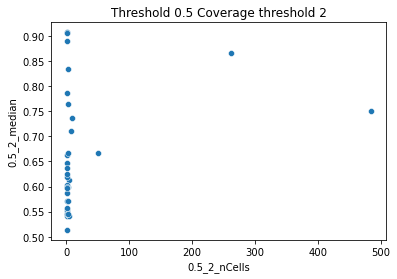

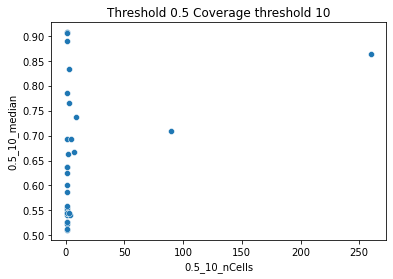

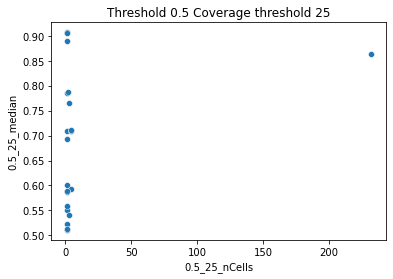

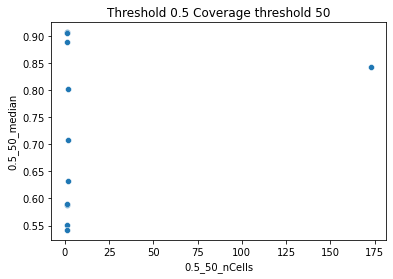

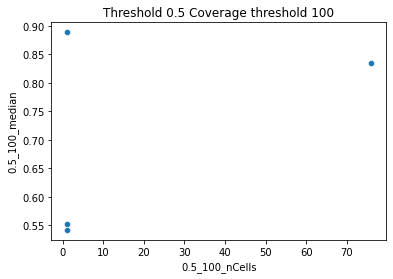

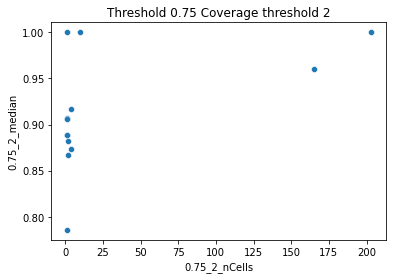

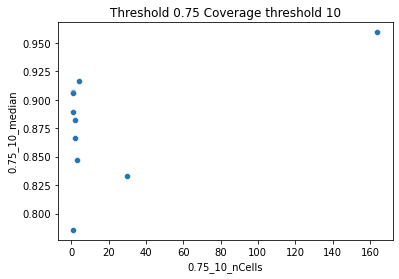

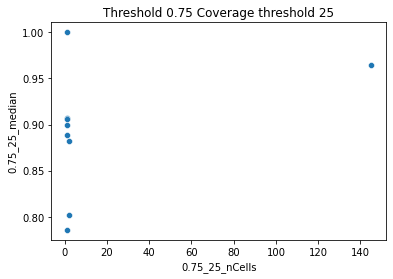

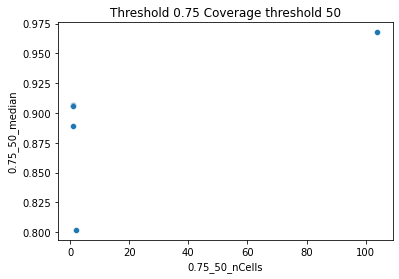

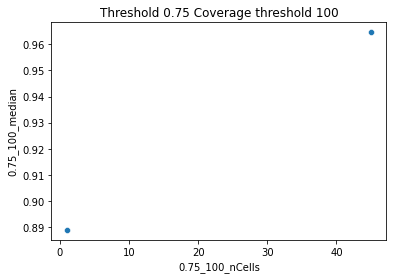

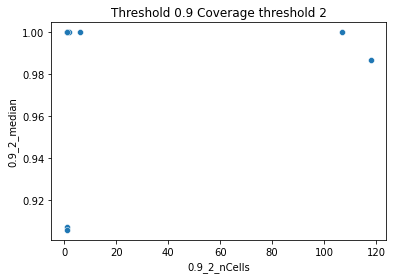

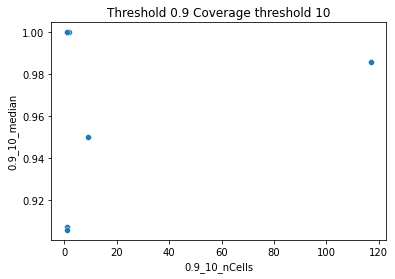

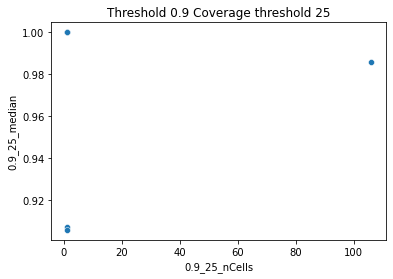

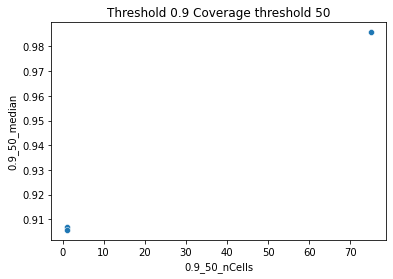

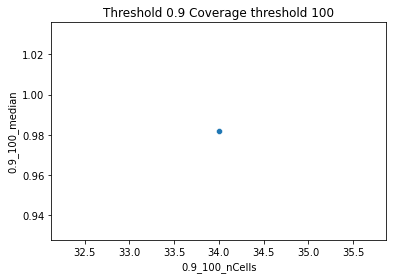

In [17]:
for t in thresholds:
    for rt in read_thresh:
        f = plt.figure()
        sns.scatterplot(x=f"{t}_{rt}_nCells",y=f"{t}_{rt}_median",data=variants_df.astype(float))
        plt.title(f"Threshold {t} Coverage threshold {rt}")

In [18]:
# cols = variants_df.columns[variants_df.columns.str.contains("_nCells")]
# cols

Index(['0.01_nCells', '0.01_2_nCells', '0.01_2_refPassCov_nCells',
       '0.01_10_nCells', '0.01_10_refPassCov_nCells', '0.01_25_nCells',
       '0.01_25_refPassCov_nCells', '0.01_50_nCells',
       '0.01_50_refPassCov_nCells', '0.01_100_nCells',
       '0.01_100_refPassCov_nCells', '0.1_nCells', '0.1_2_nCells',
       '0.1_2_refPassCov_nCells', '0.1_10_nCells', '0.1_10_refPassCov_nCells',
       '0.1_25_nCells', '0.1_25_refPassCov_nCells', '0.1_50_nCells',
       '0.1_50_refPassCov_nCells', '0.1_100_nCells',
       '0.1_100_refPassCov_nCells', '0.25_nCells', '0.25_2_nCells',
       '0.25_2_refPassCov_nCells', '0.25_10_nCells',
       '0.25_10_refPassCov_nCells', '0.25_25_nCells',
       '0.25_25_refPassCov_nCells', '0.25_50_nCells',
       '0.25_50_refPassCov_nCells', '0.25_100_nCells',
       '0.25_100_refPassCov_nCells', '0.5_nCells', '0.5_2_nCells',
       '0.5_2_refPassCov_nCells', '0.5_10_nCells', '0.5_10_refPassCov_nCells',
       '0.5_25_nCells', '0.5_25_refPassCov_nCells', '0

In [19]:
# def create_cluster_size(variants_df, cells_thresh, ref_cells_thresh):
#     inds = [f"{t}_{rt}_nCells" for t in thresholds for rt in read_thresh]
#     cluster_size_df = pd.DataFrame(index=inds, columns=["nClones", "nClones_and_nRef"])#, "fold_nClones_nRef"])
#     for t in thresholds:
#         for rt in read_thresh:
#             cluster_size_df.loc[f"{t}_{rt}_nCells","nClones"] = (variants_df[f"{t}_{rt}_nCells"] > cells_thresh).sum()
                                                      
#             cluster_size_df.loc[f"{t}_{rt}_nCells","nClones_and_nRef"] = ((variants_df[f"{t}_{rt}_nCells"] > cells_thresh) & 
#                                                                   (variants_df[f"{t}_{rt}_refPassCov_nCells"] > ref_cells_thresh)).sum() 
            
# #             fold_nClones_nRef = variants_df[((variants_df.loc["{t}_{rt}_nCells"] > cells_thresh) & 
# #                                                                   (variants_df.loc["{t}_{rt}_refPassCov_nCells"] > ref_cells_thresh))
#     f=plt.figure()
#     sns.heatmap(cluster_size_df.astype(int))
#     plt.title(f"#Variants detected \ncells in clone >= {cells_thresh} cells in ref >= {ref_cells_thresh}")
#     return cluster_size_df

# cluster_size_df = create_cluster_size(variants_df, cells_thresh=10, ref_cells_thresh=50)
# cluster_size_df

# cluster_size_df = create_cluster_size(variants_df, cells_thresh=10, ref_cells_thresh=500)


## Get clone sizes using clones that passed the filter

In [22]:
def create_cluster_size(variants_df, cells_thresh, ref_cells_thresh):
    inds = [f"{t}_{rt}_nCells" for t in thresholds for rt in read_thresh]
    num_vars_df = pd.DataFrame(index=inds, columns=["nClones", "nClones_and_nRef"])#, "fold_nClones_nRef"])
    clone_sizes_d = {}
    for t in thresholds:
        for rt in read_thresh:
            num_vars_df.loc[f"{t}_{rt}_nCells","nClones"] = (variants_df[f"{t}_{rt}_nCells"] > cells_thresh).sum()
                                                      
            num_vars_df.loc[f"{t}_{rt}_nCells","nClones_and_nRef"] = ((variants_df[f"{t}_{rt}_nCells"] > cells_thresh) & 
                                                                  (variants_df[f"{t}_{rt}_refPassCov_nCells"] > ref_cells_thresh)).sum() 
            
            passed_vars = variants_df.loc[((variants_df[f"{t}_{rt}_nCells"] > cells_thresh) & 
                                          (variants_df[f"{t}_{rt}_refPassCov_nCells"] > ref_cells_thresh))].index 
            curr_clone_sizes_d = pd.DataFrame(index=passed_vars, columns=["clone_sizes", "ref_sizes", "param"])
            curr_clone_sizes_d["param"] = f"{t}_{rt}"
            curr_clone_sizes_d["clone_sizes"] =  variants_df.loc[passed_vars, f"{t}_{rt}_nCells"]
            curr_clone_sizes_d["ref_sizes"] =  variants_df.loc[passed_vars, f"{t}_{rt}_refPassCov_nCells"]
            curr_clone_sizes_d["clone_plus_ref_sizes"] = curr_clone_sizes_d["clone_sizes"] + curr_clone_sizes_d["ref_sizes"]
            curr_clone_sizes_d["relative_size"] = curr_clone_sizes_d["clone_sizes"]/curr_clone_sizes_d["ref_sizes"]
            curr_clone_sizes_d["variant"] = passed_vars
            clone_sizes_d[(t, rt)] = curr_clone_sizes_d 
#             fold_nClones_nRef = variants_df[((variants_df.loc["{t}_{rt}_nCells"] > cells_thresh) & 
#                                                                   (variants_df.loc["{t}_{rt}_refPassCov_nCells"] > ref_cells_thresh))
#     f=plt.figure()
#     sns.heatmap(num_vars_df.astype(int))
#     plt.title(f"#Variants detected \ncells in clone >= {cells_thresh} cells in ref >= {ref_cells_thresh}")
    return clone_sizes_d, num_vars_df

,clone_sizes,ref_sizes,param,clone_plus_ref_sizes,relative_size,variant
0,238.0,3963.0,0.01_2,4201.0,0.060056,16111T
1,339.0,3863.0,0.01_2,4202.0,0.087756,7403G
2,20.0,4185.0,0.01_2,4205.0,0.004779,3242A
3,296.0,3906.0,0.01_2,4202.0,0.075781,513A
4,182.0,4022.0,0.01_2,4204.0,0.045251,7639T
...,...,...,...,...,...,...
1197,107.0,1977.0,0.9_2,2084.0,0.054122,248G
1198,117.0,4062.0,0.9_10,4179.0,0.028804,11149A
1199,106.0,3605.0,0.9_25,3711.0,0.029404,11149A
1200,75.0,2569.0,0.9_50,2644.0,0.029194,11149A


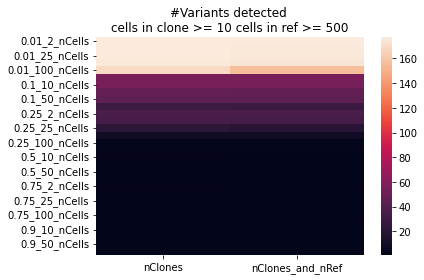

In [23]:
clone_sizes_d, num_vars_df = create_cluster_size(variants_df, cells_thresh=10, ref_cells_thresh=500)
clone_sizes_d = pd.concat(clone_sizes_d, ignore_index=True)
clone_sizes_d

,clone_sizes,ref_sizes,param,clone_plus_ref_sizes,relative_size,variant
0,238.0,3963.0,0.01_2,4201.0,0.060056,16111T
1,339.0,3863.0,0.01_2,4202.0,0.087756,7403G
2,20.0,4185.0,0.01_2,4205.0,0.004779,3242A
3,296.0,3906.0,0.01_2,4202.0,0.075781,513A
4,182.0,4022.0,0.01_2,4204.0,0.045251,7639T
...,...,...,...,...,...,...
1197,107.0,1977.0,0.9_2,2084.0,0.054122,248G
1198,117.0,4062.0,0.9_10,4179.0,0.028804,11149A
1199,106.0,3605.0,0.9_25,3711.0,0.029404,11149A
1200,75.0,2569.0,0.9_50,2644.0,0.029194,11149A


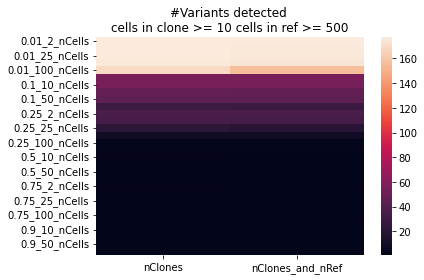

In [23]:
clone_sizes_d_c10_ref50, num_vars_df_c10_ref50 = create_cluster_size(variants_df, cells_thresh=10, ref_cells_thresh=50)
clone_sizes_d_c10_ref50 = pd.concat(clone_sizes_d_c10_ref50, ignore_index=True)
clone_sizes_d_c10_ref50

In [ ]:
f=plt.figure()
sns.heatmap(cluster_size_df.astype(int))
plt.title(f"#Variants detected \ncells in clone >= {cells_thresh} cells in ref >= {ref_cells_thresh}")

## Number of clones across different AF+coverage thresholds
(2 other parameters, min_cells=10 and ref_cells_thresh=500 are used here, which are the thresholds for the cluster sizes and the reference variant being covered by a sufficient number of cells)

Text(0.5, 1.0, 'Number of clones detected\nminimum cells=10, ref_cells_thresh=500')

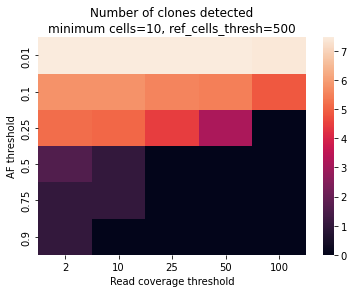

In [24]:

num_vars_mat_df = pd.DataFrame(index=thresholds,columns=read_thresh, dtype=int)
for t in thresholds:
    for rt in read_thresh:
        num_vars_mat_df.loc[t,rt] = num_vars_df.loc[f"{t}_{rt}_nCells","nClones"]
sns.heatmap(np.log2(num_vars_mat_df))
plt.ylabel("AF threshold")
plt.xlabel("Read coverage threshold")
plt.title(f"Number of clones detected\nminimum cells={cells_thresh}, ref_cells_thresh={ref_cells_thresh}")
# add size of each to reflect number of cells total

In [25]:
log2_clone_sizes_d = np.log2(clone_sizes_d[["clone_sizes", "ref_sizes", "clone_plus_ref_sizes"]].astype(int))
log2_clone_sizes_d["relative_size"] = log2_clone_sizes_d["clone_sizes"]/log2_clone_sizes_d["ref_sizes"]
log2_clone_sizes_d["param"] = clone_sizes_d["param"]
log2_clone_sizes_d["variant"] = clone_sizes_d["variant"]
log2_clone_sizes_d

,clone_sizes,ref_sizes,clone_plus_ref_sizes,relative_size,param,variant
0,7.894818,11.952377,12.036517,0.660523,0.01_2,16111T
1,8.405141,11.915506,12.036860,0.705395,0.01_2,7403G
2,4.321928,12.031012,12.037890,0.359232,0.01_2,3242A
3,8.209453,11.931476,12.036860,0.688050,0.01_2,513A
4,7.507795,11.973697,12.037547,0.627024,0.01_2,7639T
...,...,...,...,...,...,...
1197,6.741467,10.949097,11.025140,0.615710,0.9_2,248G
1198,6.870365,11.987975,12.028942,0.573105,0.9_10,11149A
1199,6.727920,11.815784,11.857592,0.569401,0.9_25,11149A
1200,6.228819,11.326991,11.368506,0.549909,0.9_50,11149A


Text(0.5, 0.98, 'Clone sizes vs clone+reference sizes (log2)')

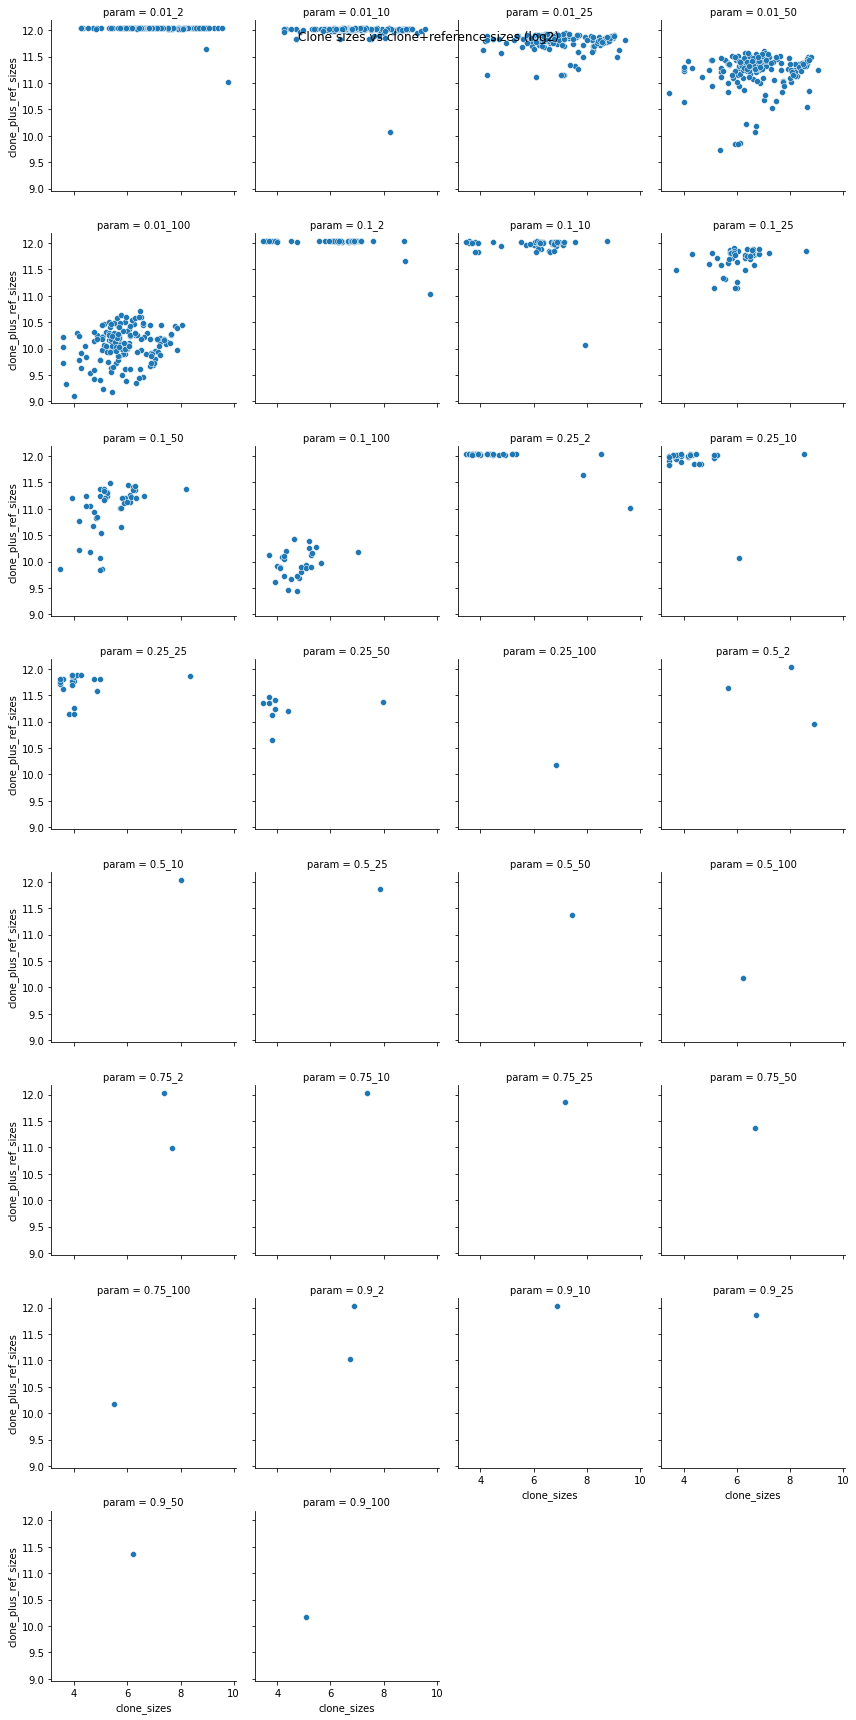

In [26]:
g = sns.FacetGrid(data=log2_clone_sizes_d,col="param", col_wrap=4)
g.map(sns.scatterplot, "clone_sizes", "clone_plus_ref_sizes")
g.fig.suptitle("Clone sizes vs clone+reference sizes (log2)")
plt.tight_layout()

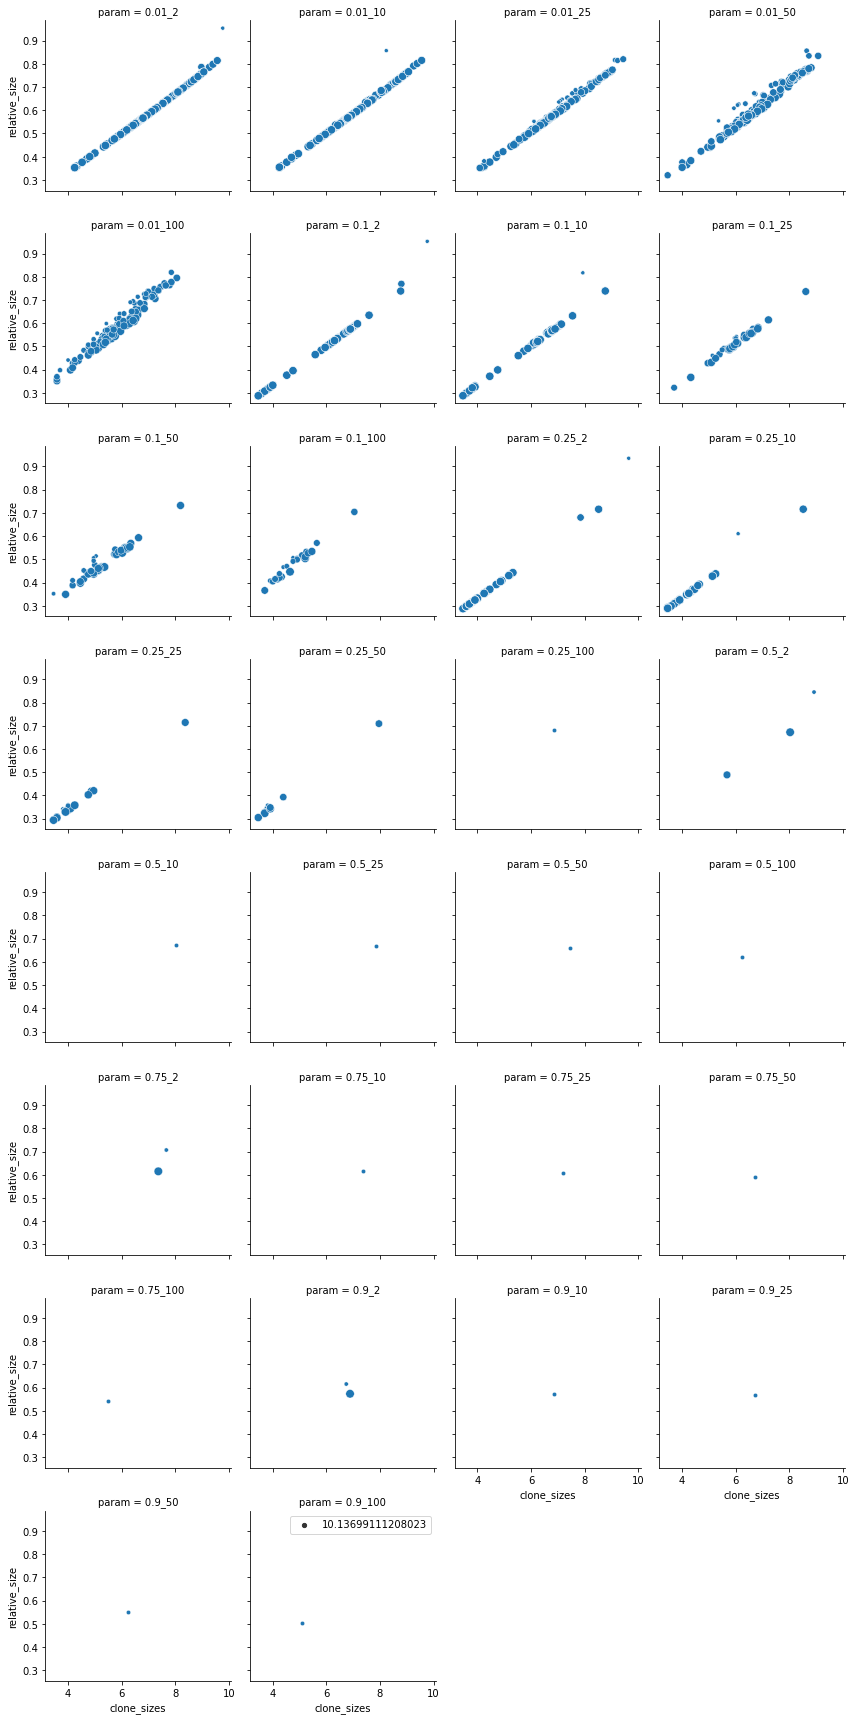

In [27]:
g = sns.FacetGrid(data=log2_clone_sizes_d,col="param", col_wrap=4)
g.map_dataframe(sns.scatterplot, "clone_sizes", "relative_size", size="ref_sizes")
plt.legend()
g.fig.suptitle("Clone sizes (log2) vs relative clone size in population")
plt.tight_layout()

## For each parameter, rank clones by i) highest nCells and ii) highest nRef
## Create df where index is cell and columns are 'variant,' 'isClone', 'af' 
### To do this, use variants dict of passed indices
## For each variant plot the distribution and hue=isClone


In [65]:
def create_distributions(t, rt, variants_cell_index_d, af, clone_thresh, ref_cells_thresh):
    ic(t,rt)
    clone_var_distributions = pd.DataFrame(columns=["variant", "isClone", "af"])
    for v in variants_cell_index_d:
        curr_v = variants_cell_index_d[v]
        curr_cells = curr_v[(t,rt)]
        curr_ref_cells = curr_v[(t,rt, "ref_pass_cov")]
            
        if len(curr_cells) < clone_thresh or len(curr_ref_cells) < ref_cells_thresh:
            #ic(f"variant {v} not pass threshold")
            continue 
        curr_clone = pd.DataFrame(index=curr_cells, columns=["variant", "isClone", "af", "param"])
        curr_clone["isClone"] = True
        curr_clone["variant"] = v
        curr_clone["param"] = f"{t}_{rt}"
        curr_clone["af"] = af.loc[curr_cells, v]
        curr_clone["cell"] = af.loc[curr_cells].index
        clone_var_distributions = pd.concat((clone_var_distributions, 
                                             curr_clone),axis=0, ignore_index=True)
        curr_ref = pd.DataFrame(index=curr_ref_cells, columns=["variant", "isClone", "af"])
        curr_ref["isClone"] = False
        curr_ref["variant"] = v
        curr_ref["param"] = f"{t}_{rt}"
        curr_ref["af"] = af.loc[curr_ref_cells, v]
        curr_ref["cell"] = af.loc[curr_ref_cells].index
        clone_var_distributions = pd.concat((clone_var_distributions, 
                                             curr_ref),axis=0, ignore_index=True)          
    return clone_var_distributions



In [95]:
def plot_violin(clone_var_dist, col_order):
    g = sns.FacetGrid(data=clone_var_dist, col="variant", col_wrap=8, 
                      sharex=False, 
                      sharey=False,col_order=col_order)
    g.map_dataframe(sns.violinplot, x="isClone", y="af")    
    return g

def plot_hist(clone_var_dist, col_order):
    g = sns.FacetGrid(data=clone_var_distributions, col="variant", col_wrap=8, hue="isClone",
                      sharex=False, 
                      sharey=False, col_order=col_order)
    g.map_dataframe(sns.histplot, x="af", stat="probability")
    return

def get_var_order(clone_var_dist, variants_df, t, rt):
    curr_vars = set(clone_var_dist["variant"])
    var_order = variants_df.loc[curr_vars].sort_values([f"{t}_{rt}_nCells", f"{t}_{rt}_refPassCov_nCells"], ascending=False).index
    return var_order

ic| t: 0.1, rt: 25


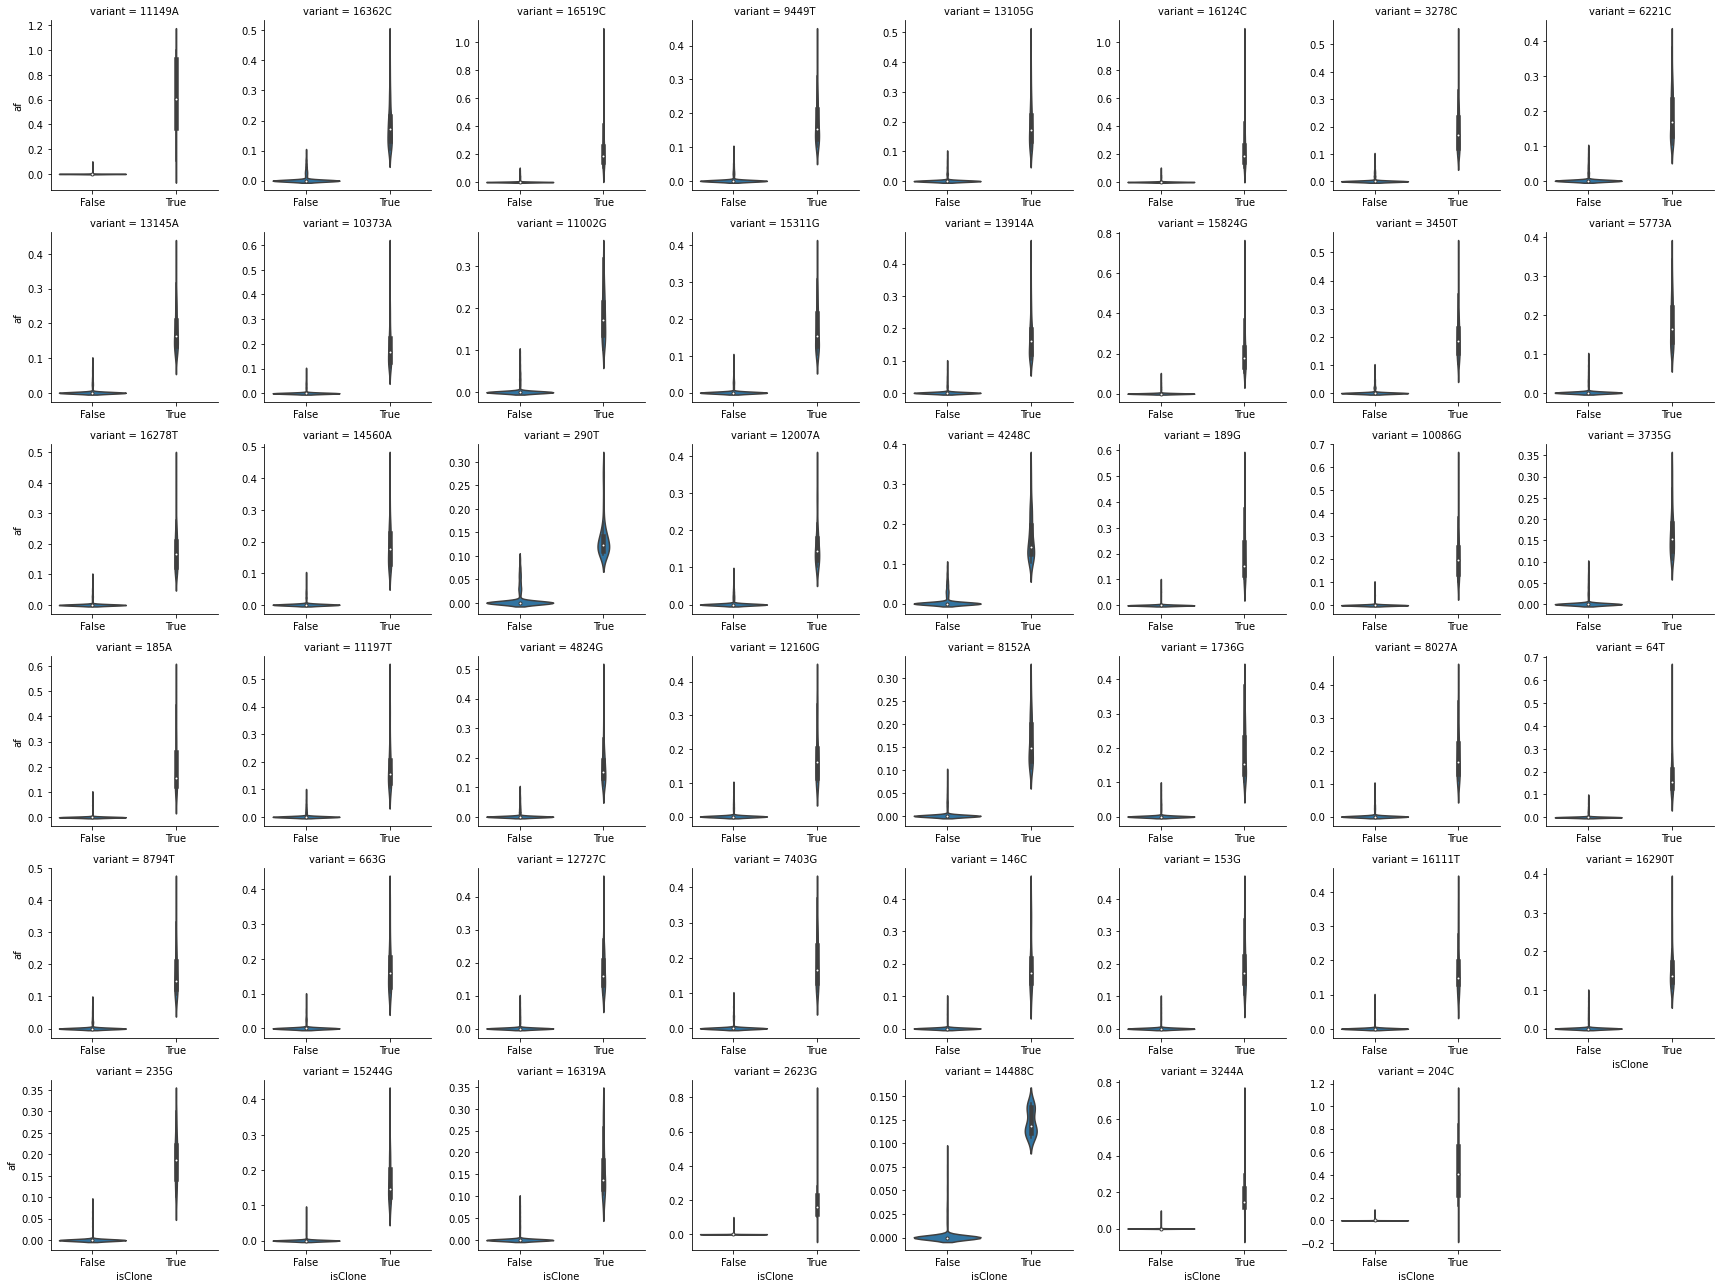

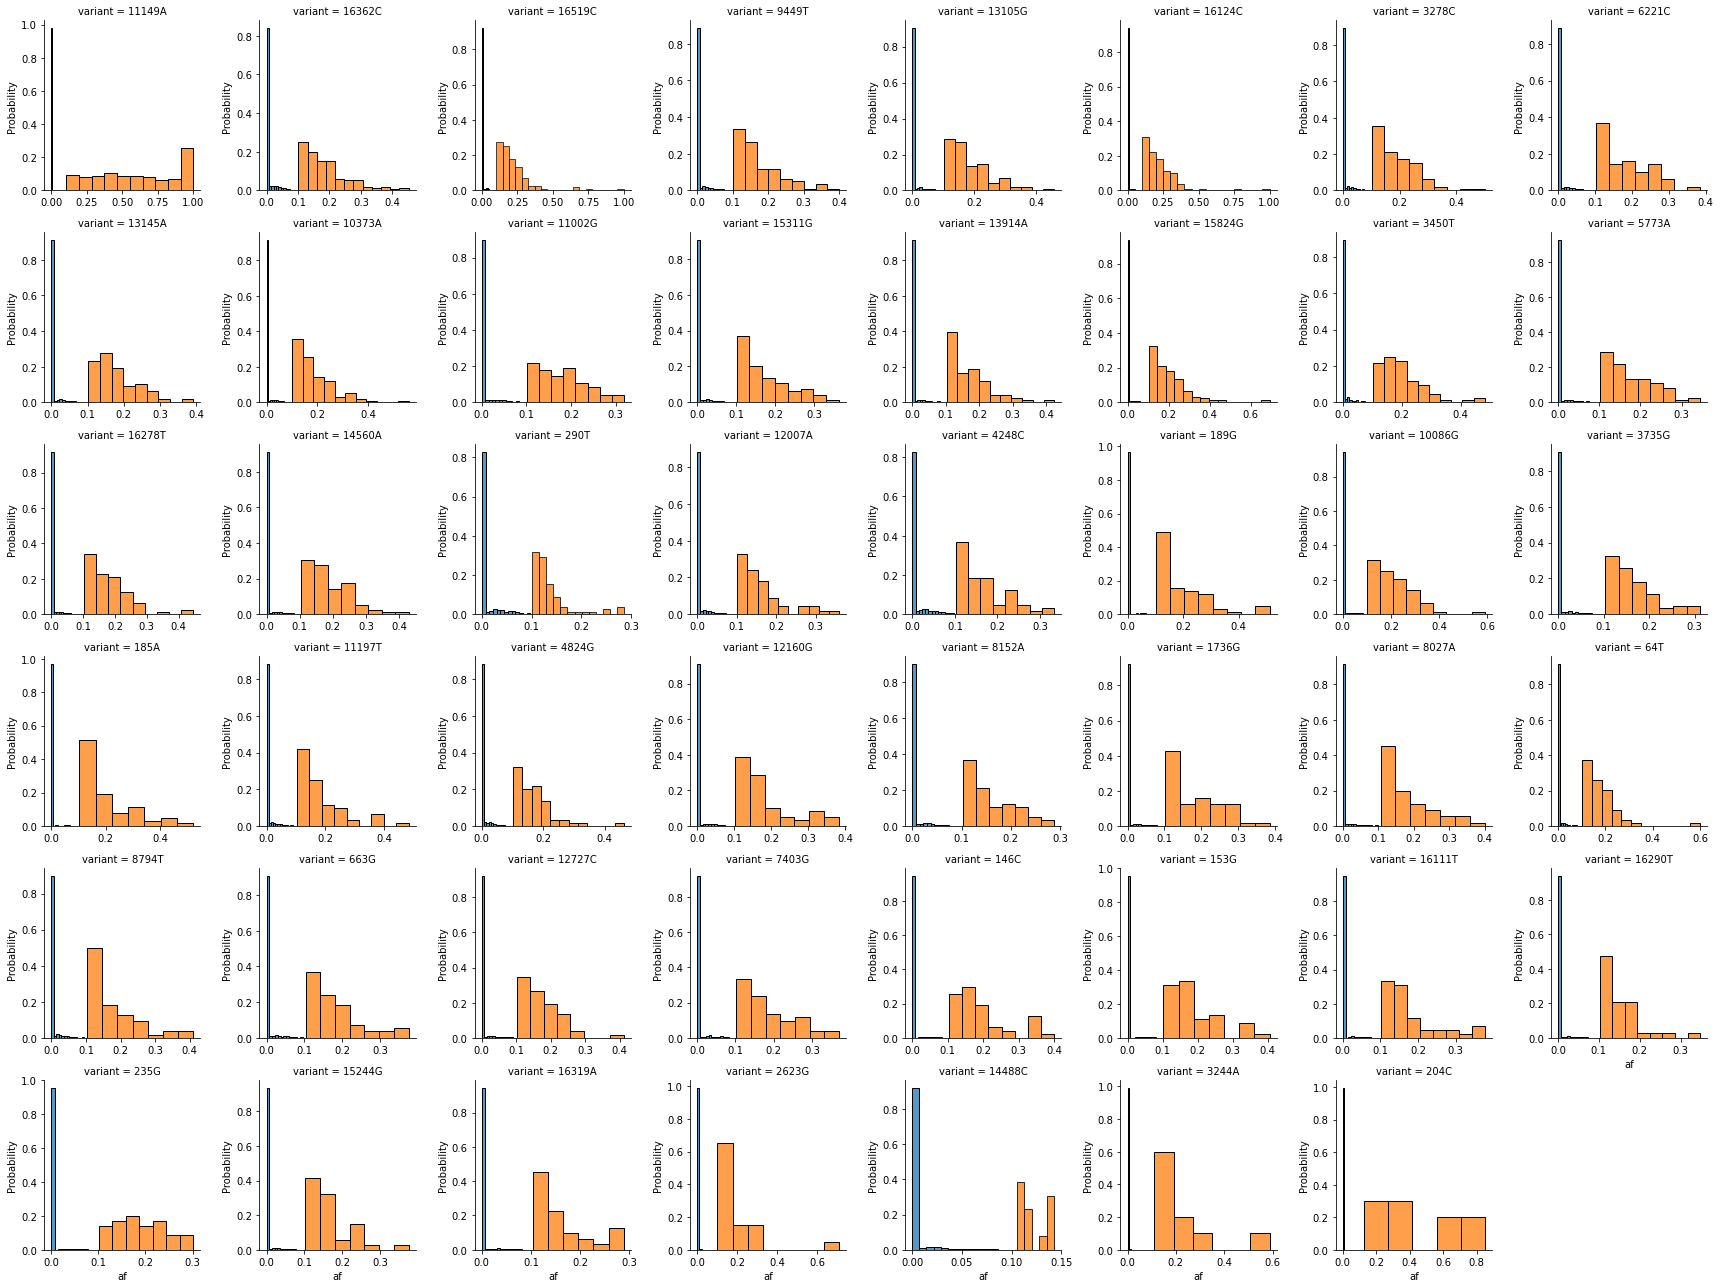

In [97]:
%matplotlib inline
t=0.1
rt=25
clone_var_distributions = create_distributions(t,rt, variants_cell_index_d, af, cells_thresh, ref_cells_thresh)  

col_order = get_var_order(clone_var_distributions, variants_df, t, rt)
g_vln = plot_violin(clone_var_distributions, col_order)
g_hist = plot_hist(clone_var_distributions, col_order)

ic| t: 0.25, rt: 25


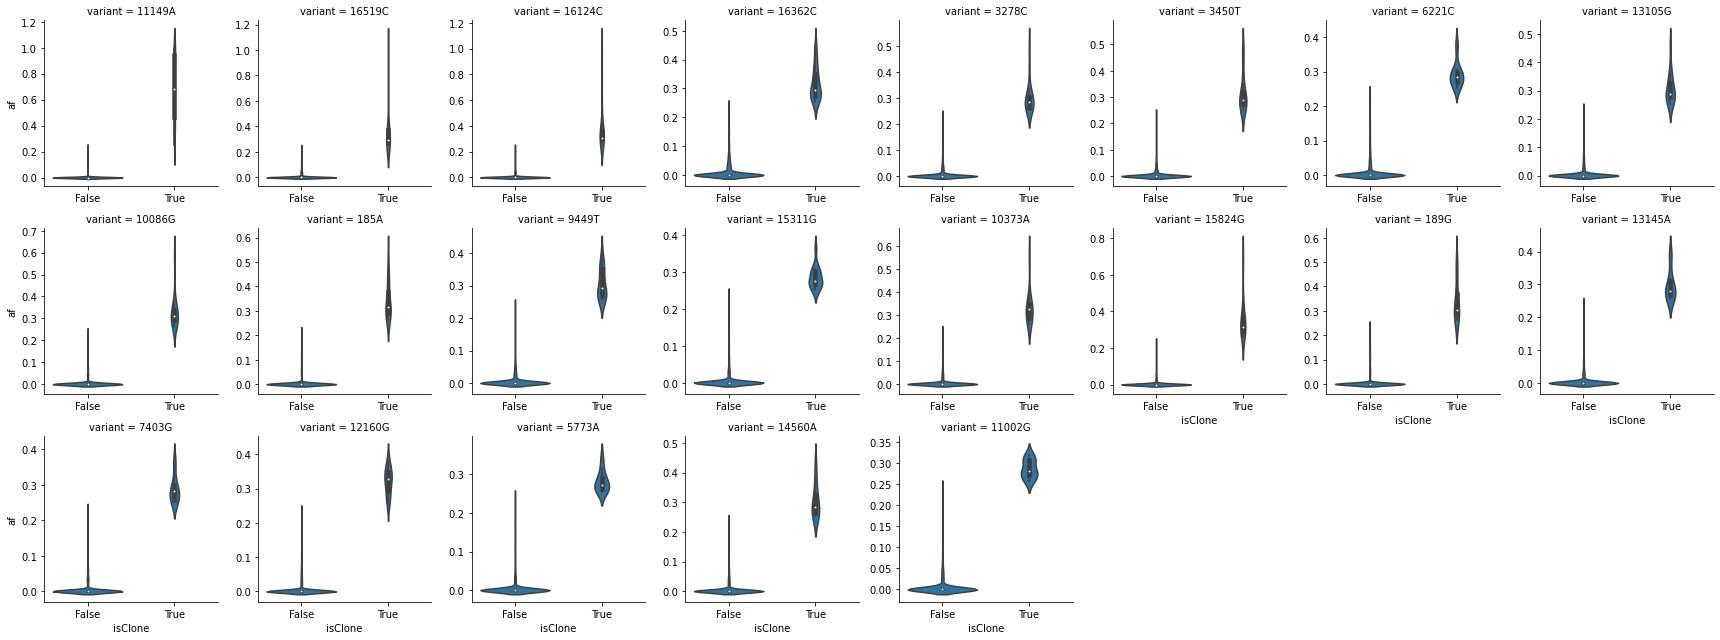

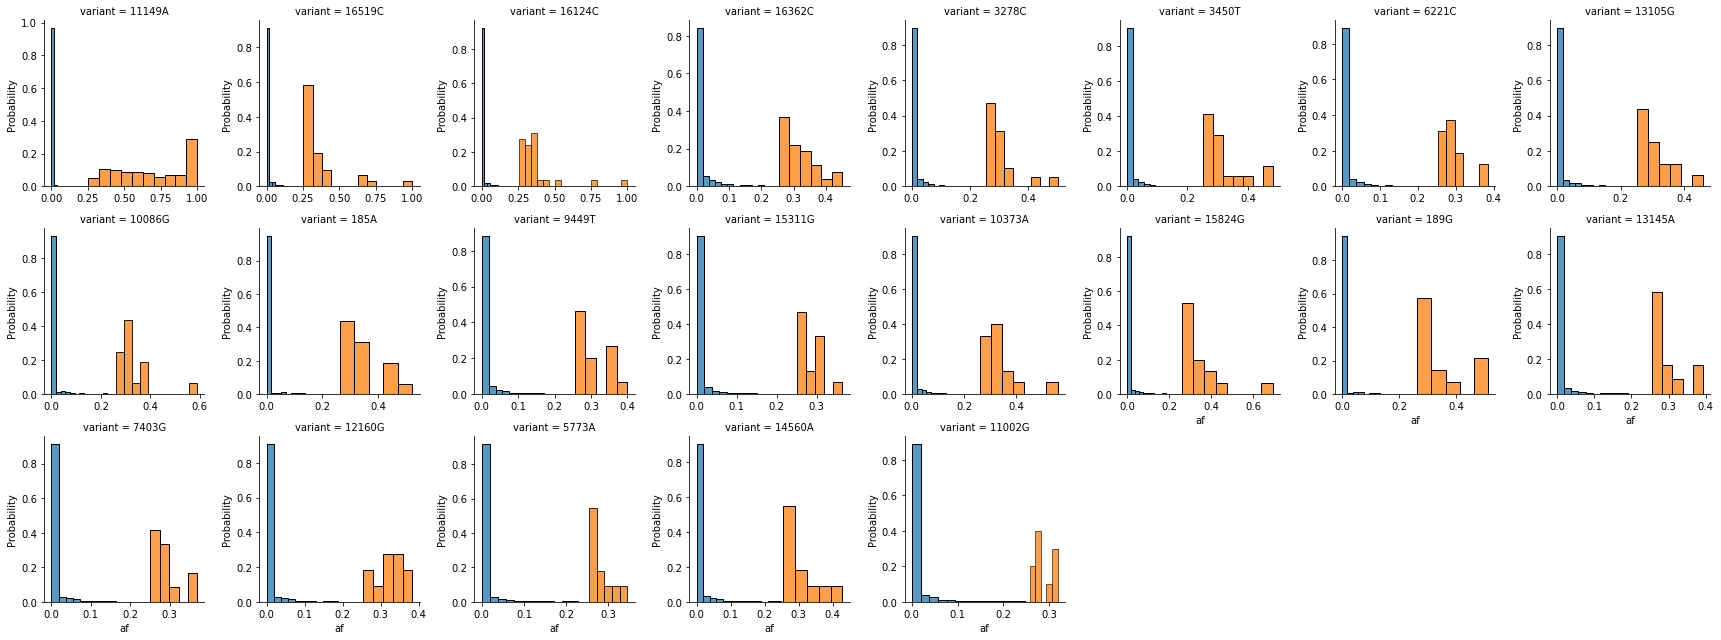

In [96]:
%matplotlib inline
t=0.25
rt=25
clone_var_distributions = create_distributions(t,rt, variants_cell_index_d, af, cells_thresh, ref_cells_thresh)  

col_order = get_var_order(clone_var_distributions, variants_df, t, rt)
g_vln = plot_violin(clone_var_distributions, col_order)
g_hist = plot_hist(clone_var_distributions, col_order)

In [91]:
len((clone_var_distributions.groupby(["variant", "param"])).size())

47

In [33]:
# distributions_dict = {}
# for t in thresholds:
#     for rt in read_thresh:
#         ic(t,rt)
#         clone_var_distributions = create_distributions(t,rt, variants_cell_index_d, af, cells_thresh, ref_cells_thresh)          
#         distributions_dict[(t,rt)] = clone_var_distributions